In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

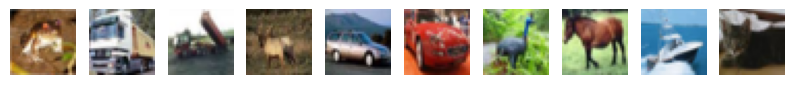

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,57,39,41,56,36,38,53,37,39,54
49996,255,245,132,254,247,134,255,249,137,254,...,82,249,174,79,252,181,81,253,181,76
49997,35,178,235,40,176,239,42,176,241,39,...,87,27,52,77,21,43,66,12,31,50
49998,189,211,240,186,208,236,185,207,235,184,...,165,195,184,169,196,189,171,195,190,171


In [14]:
# Load the CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# print first 10 images
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()
pd.DataFrame(X_train.reshape(X_train.shape[0], -1))

In [15]:
X_train = X_train / 255
X_test = X_test / 255

# Split the data into train, validation, and test sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [16]:
# Convert the labels to one-hot encoded
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_val = keras.utils.to_categorical(Y_val, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)
pd.DataFrame(Y_train.reshape(Y_train.shape[0], -1))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3651 - loss: 1.7232 - val_accuracy: 0.5416 - val_loss: 1.2724
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.5915 - loss: 1.1509 - val_accuracy: 0.6176 - val_loss: 1.0655
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6656 - loss: 0.9489 - val_accuracy: 0.6688 - val_loss: 0.9455
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7159 - loss: 0.8113 - val_accuracy: 0.6820 - val_loss: 0.9126
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7508 - loss: 0.7105 - val_accuracy: 0.6974 - val_loss: 0.8853
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7826 - loss: 0.6210 - val_accuracy: 0.7015 - val_loss: 0.8951
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8065 - loss: 0.5502 - val_accuracy: 0.7186 - val_loss: 0.8745
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8349 -

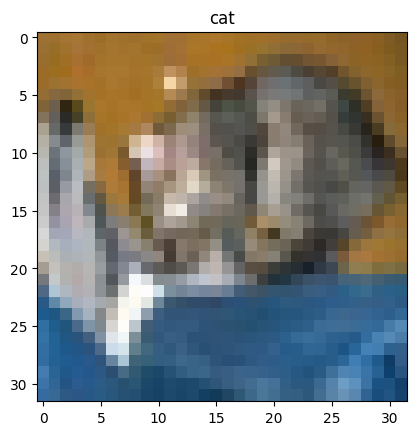

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The class of the image is: ship


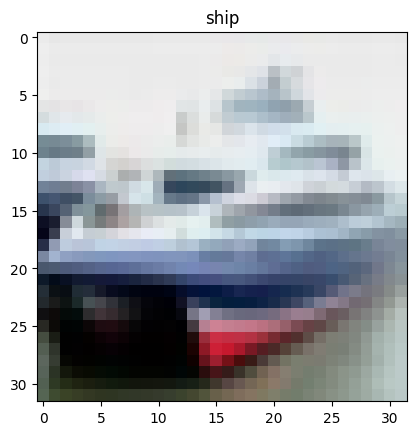

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The class of the image is: ship


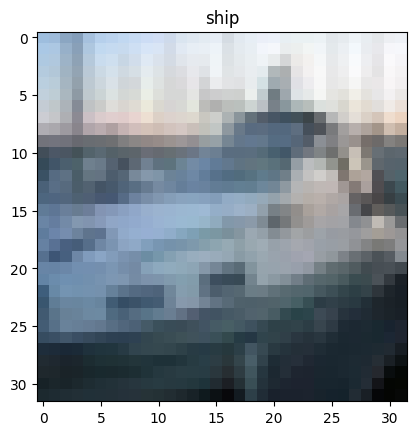

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The class of the image is: airplane


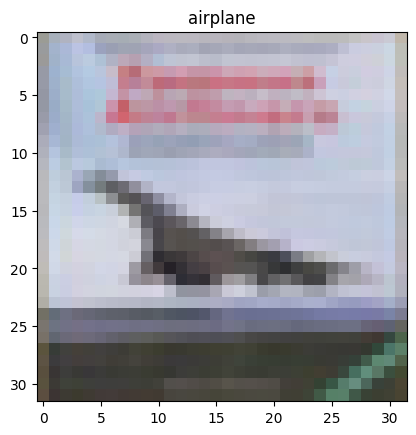

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The class of the image is: deer


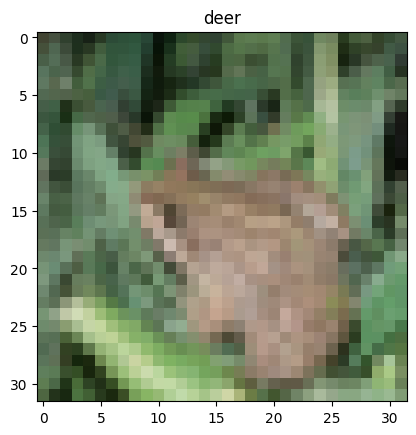

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The class of the image is: frog


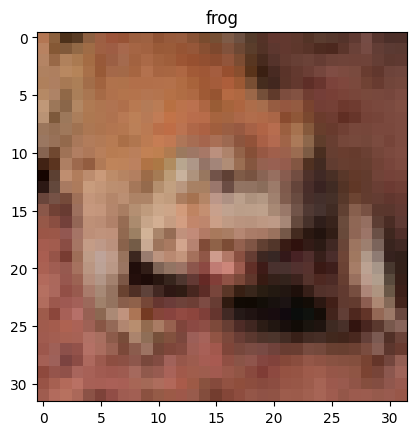

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The class of the image is: automobile


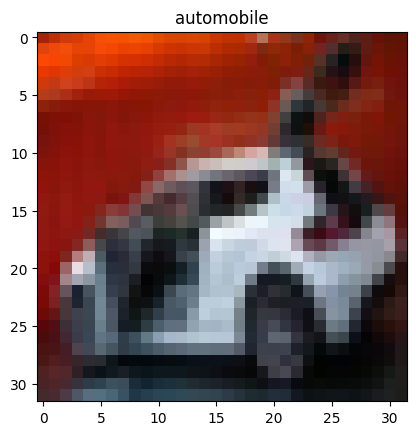

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The class of the image is: frog


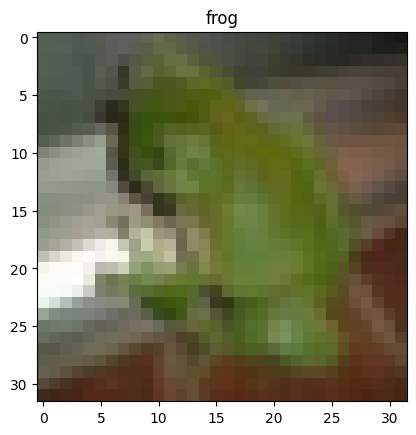

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The class of the image is: cat


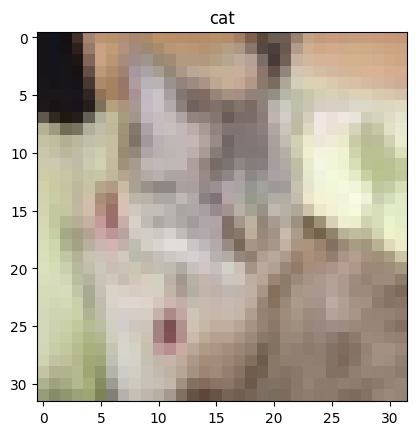

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The class of the image is: automobile


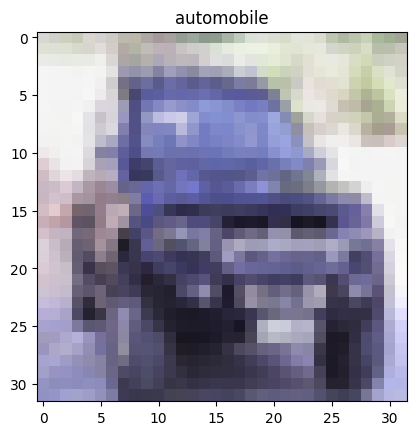

In [19]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

# Evaluate the model
model.evaluate(X_test, Y_test)

# Create a predict function
def predict(test_sample, model):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    test_sample = np.expand_dims(test_sample, axis=0)
    prediction = model.predict(test_sample)
    class_index = np.argmax(prediction)
    class_name = class_names[class_index]
    print(f"The class of the image is: {class_name}")
    plt.imshow(test_sample[0])
    plt.title(class_name)
    plt.show()

    
# Test the predict function with the first 10 images
for i in range(10):
    predict(X_test[i], model)

c:\Users\hazem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.3262 - loss: 1.8033 - val_accuracy: 0.5457 - val_loss: 1.2645
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5635 - loss: 1.2309 - val_accuracy: 0.6213 - val_loss: 1.0764
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6345 - loss: 1.0394 - val_accuracy: 0.6561 - val_loss: 0.9819
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6714 - loss: 0.9349 - val_accuracy: 0.6940 - val_loss: 0.8759
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6942 - loss: 0.8612 - val_accuracy: 0.7086 - val_loss: 0.8540
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7296 - loss: 0.7730 - val_accuracy: 0.7058 - val_loss: 0.8590
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7457 - loss: 0.7235 - val_accuracy: 0.7217 - val_loss: 0.8247
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.7669 -

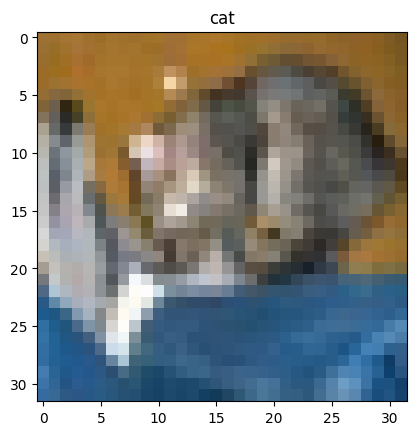

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The class of the image is: ship


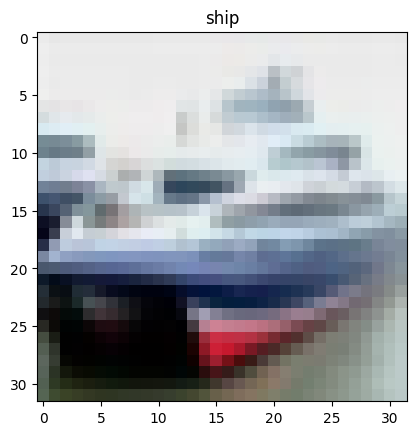

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The class of the image is: ship


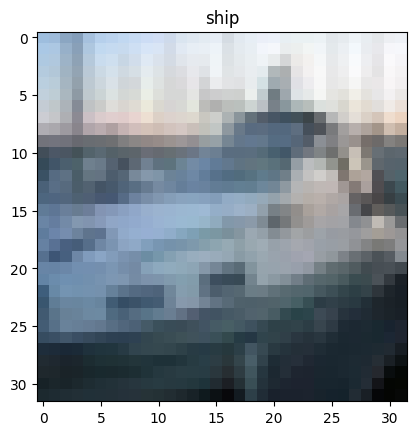

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The class of the image is: airplane


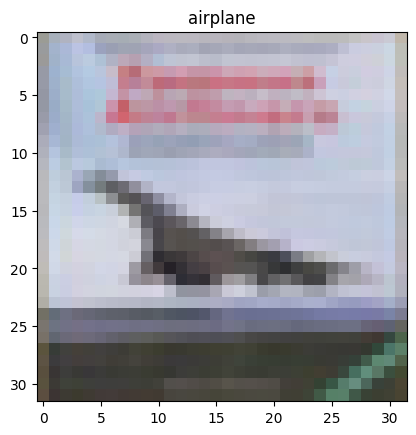

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The class of the image is: deer


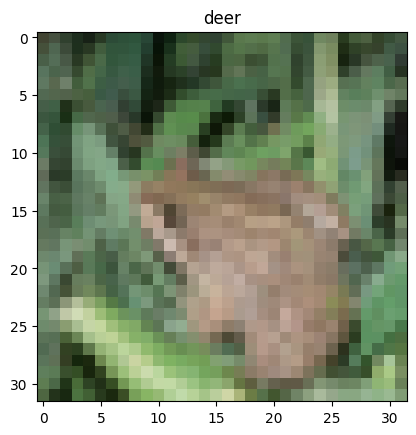

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The class of the image is: frog


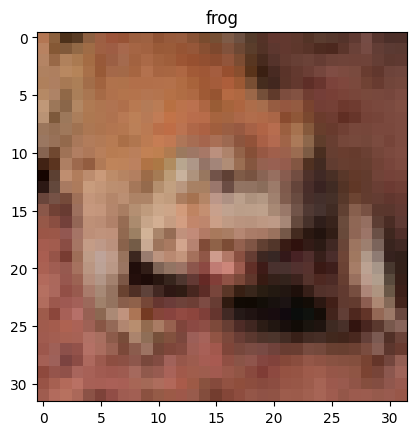

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The class of the image is: automobile


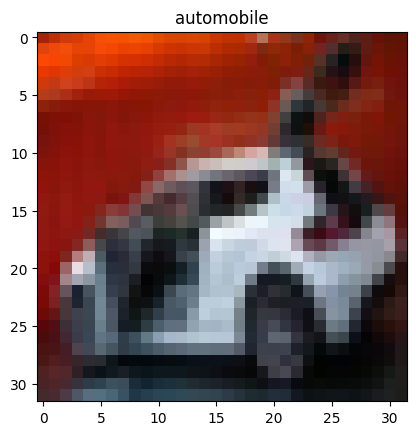

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The class of the image is: frog


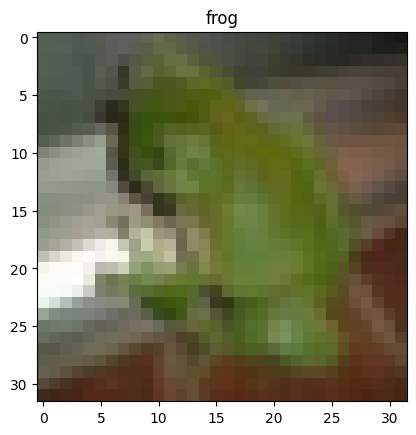

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The class of the image is: cat


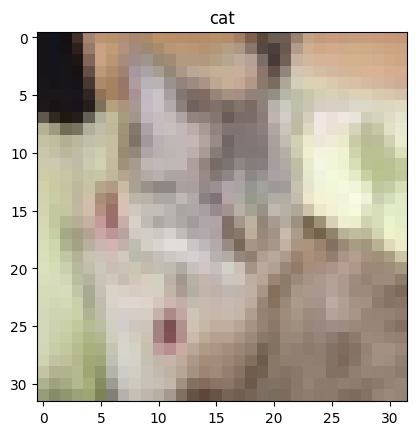

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The class of the image is: automobile


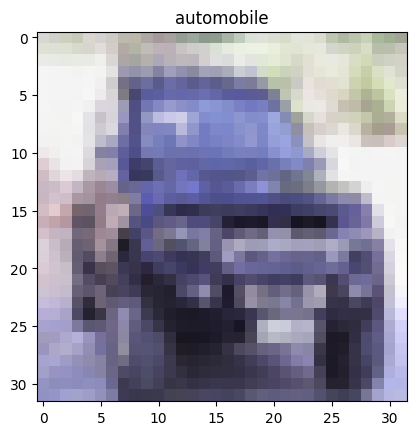

In [18]:
# compare the result of all 4 architectures and choose the best one
# 1. 3 Conv2D layers
# 2. 3 Conv2D layers with dropout
# 3. 4 Conv2D layers
# 4. 4 Conv2D layers with dropout

# 2. 3 Conv2D layers with dropout
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

model2.summary()

model2.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

model2.evaluate(X_test, Y_test)

for i in range(10):
    predict(X_test[i], model2)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,486,986 (9.49 MB)

 Trainable params: 2,486,986 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - accuracy: 0.3593 - loss: 1.7270 - val_accuracy: 0.5821 - val_loss: 1.1758
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.6182 - loss: 1.0740 - val_accuracy: 0.6586 - val_loss: 0.9562
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 43ms/step - accuracy: 0.7090 - loss: 0.8263 - val_accuracy: 0.7188 - val_loss: 0.8209
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.7709 - loss: 0.6491 - val_accuracy: 0.7185 - val_loss: 0.8580
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 39ms/step - accuracy: 0.8264 - loss: 0.4922 - val_accuracy: 0.7225 - val_loss: 0.8500
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.8812 - loss: 0.3416 - val_accuracy: 0.7347 - val_loss: 0.8841
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.9190 - loss: 0.2303 - val_accuracy: 0.7277 - val_loss: 1.0025
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.9424 -

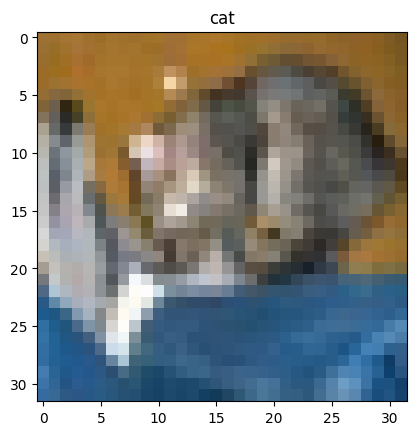

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The class of the image is: ship


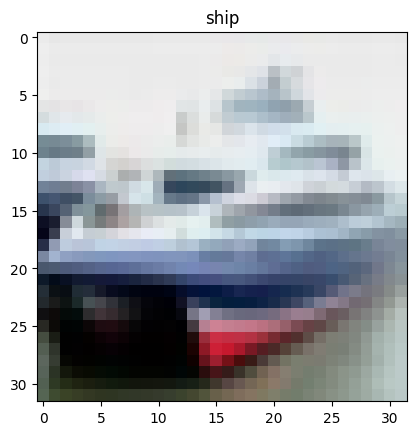

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The class of the image is: ship


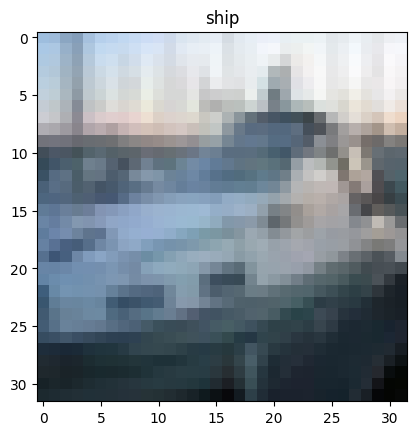

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The class of the image is: airplane


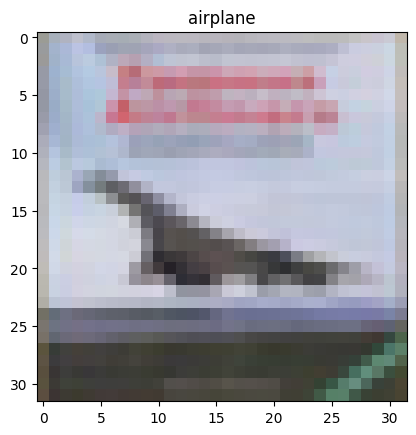

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The class of the image is: frog


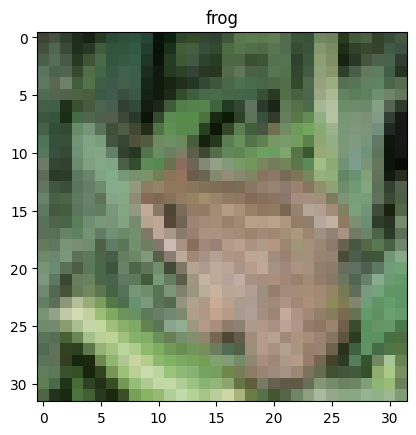

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The class of the image is: frog


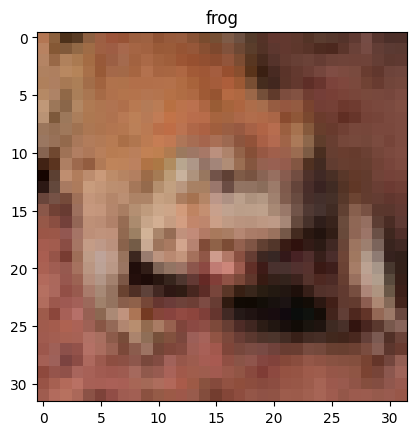

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The class of the image is: automobile


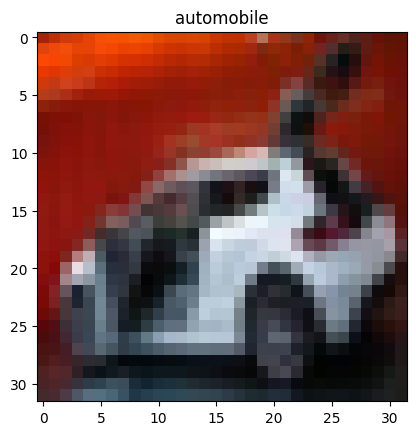

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The class of the image is: frog


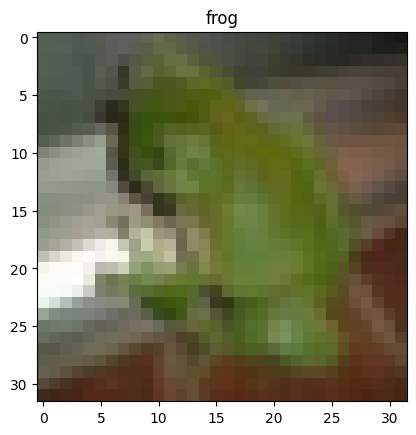

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The class of the image is: cat


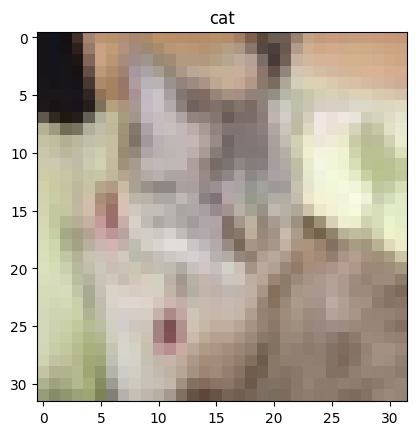

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The class of the image is: automobile


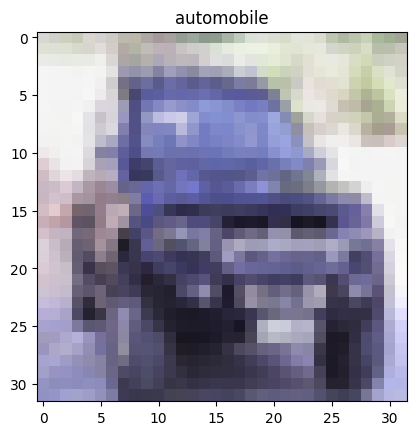

In [20]:
# 3. 4 Conv2D layers but put padding to avoid negative dimension
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

model3.summary()

model3.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

model3.evaluate(X_test, Y_test)

for i in range(10):
    predict(X_test[i], model3)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,486,986 (9.49 MB)

 Trainable params: 2,486,986 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 37ms/step - accuracy: 0.3279 - loss: 1.8026 - val_accuracy: 0.5687 - val_loss: 1.1981
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.5848 - loss: 1.1591 - val_accuracy: 0.6663 - val_loss: 0.9506
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6585 - loss: 0.9567 - val_accuracy: 0.7010 - val_loss: 0.8562
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.7058 - loss: 0.8320 - val_accuracy: 0.7014 - val_loss: 0.8472
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.7419 - loss: 0.7270 - val_accuracy: 0.7239 - val_loss: 0.7910
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.7690 - loss: 0.6459 - val_accuracy: 0.7263 - val_loss: 0.8101
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.7997 - loss: 0.5671 - val_accuracy: 0.7387 - val_loss: 0.7852
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 40ms/step - accuracy: 0.8310 -

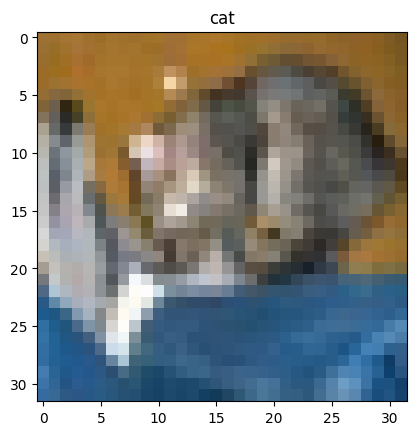

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The class of the image is: ship


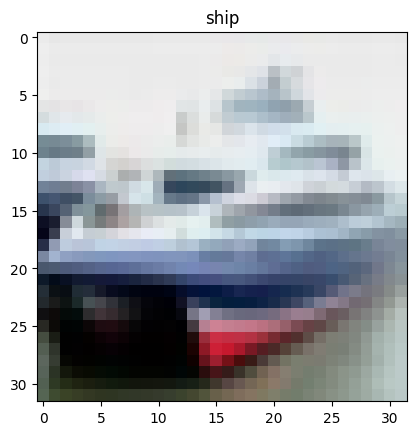

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The class of the image is: ship


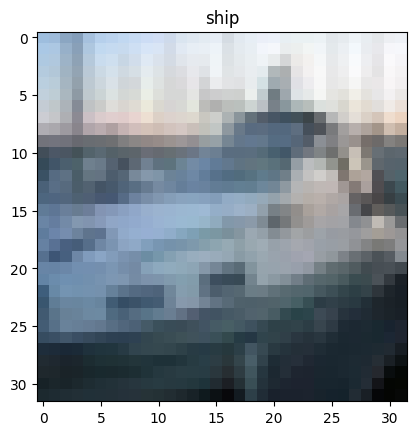

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The class of the image is: airplane


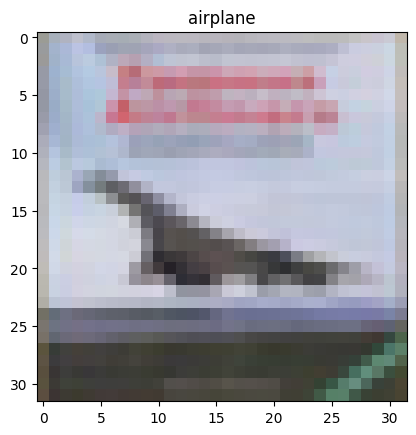

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The class of the image is: frog


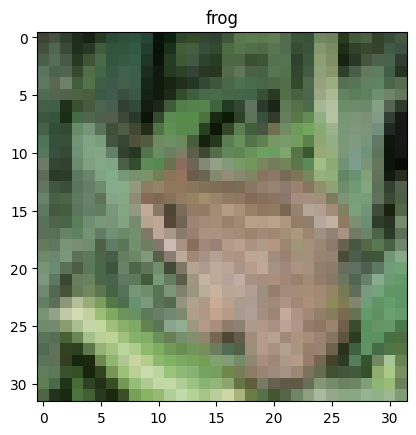

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The class of the image is: frog


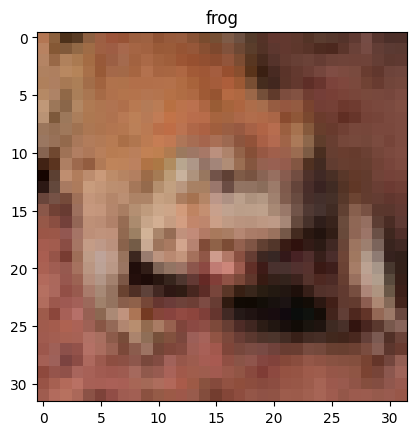

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The class of the image is: automobile


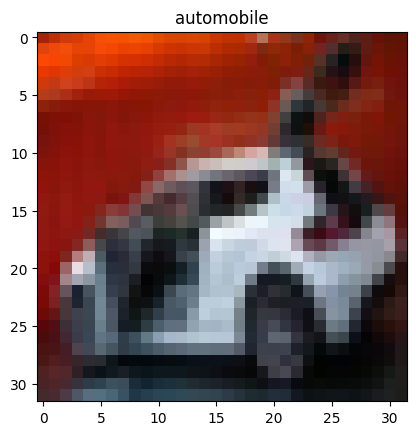

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The class of the image is: frog


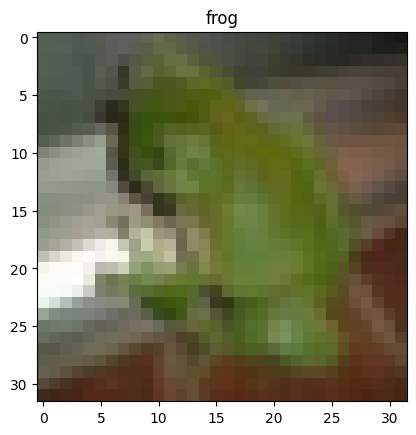

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The class of the image is: cat


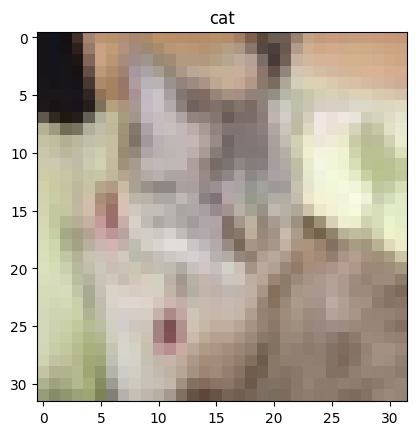

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The class of the image is: automobile


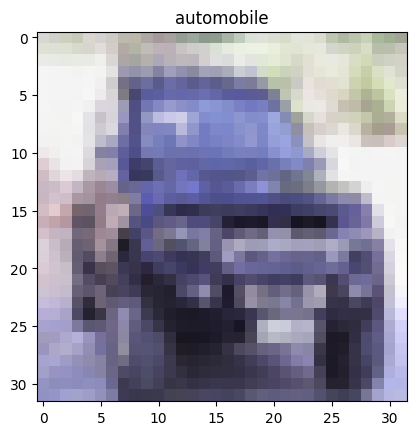

In [21]:
# 4. 4 Conv2D layers with dropout
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model4.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

model4.summary()

model4.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

model4.evaluate(X_test, Y_test)

for i in range(10):
    predict(X_test[i], model4)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251,242 (4.77 MB)

 Trainable params: 1,251,050 (4.77 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - accuracy: 0.3445 - loss: 1.9223 - val_accuracy: 0.4892 - val_loss: 1.4694
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.5639 - loss: 1.2303 - val_accuracy: 0.6213 - val_loss: 1.0686
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.6382 - loss: 1.0333 - val_accuracy: 0.6820 - val_loss: 0.8955
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.6810 - loss: 0.9116 - val_accuracy: 0.6650 - val_loss: 1.0671
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.7033 - loss: 0.8516 - val_accuracy: 0.7345 - val_loss: 0.7683
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.7298 - loss: 0.7860 - val_accuracy: 0.7078 - val_loss: 0.8434
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - accuracy: 0.7406 - loss: 0.7437 - val_accuracy: 0.7506 - val_loss: 0.7446
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.7548 -

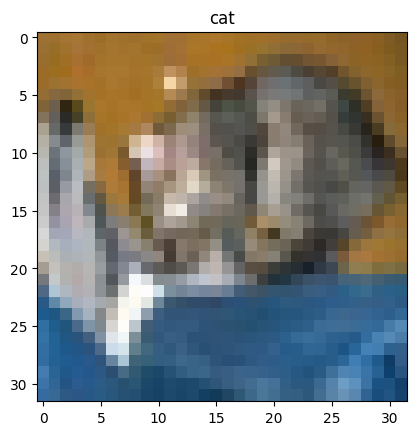

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The class of the image is: ship


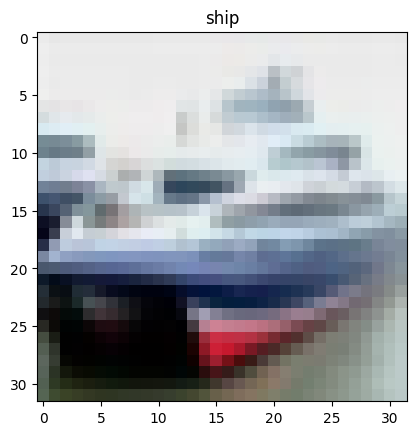

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The class of the image is: ship


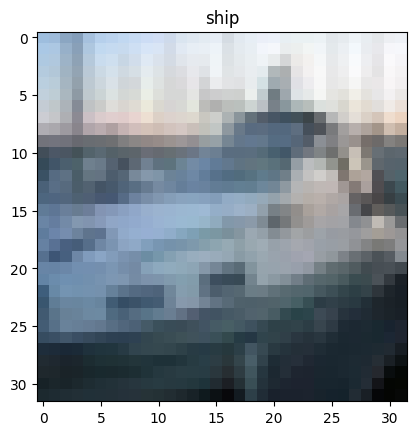

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The class of the image is: airplane


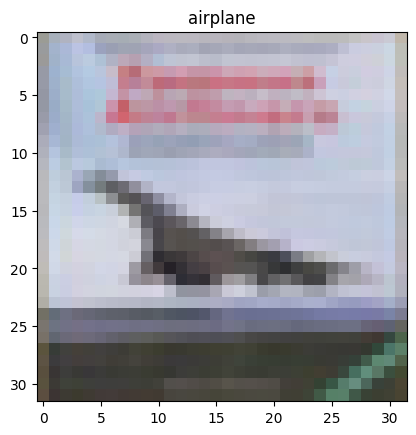

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The class of the image is: frog


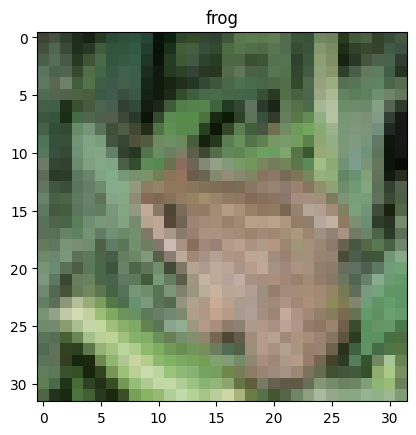

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The class of the image is: frog


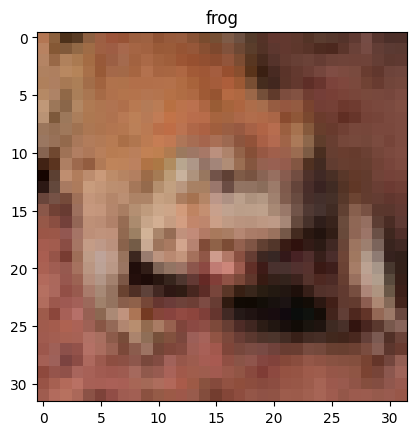

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The class of the image is: automobile


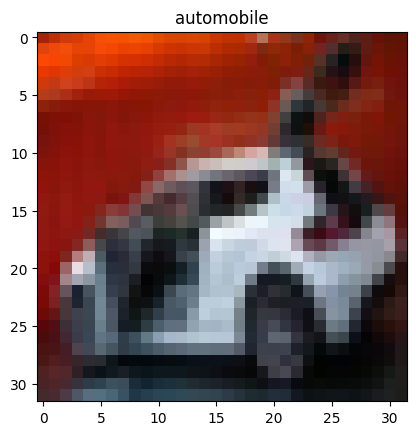

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The class of the image is: frog


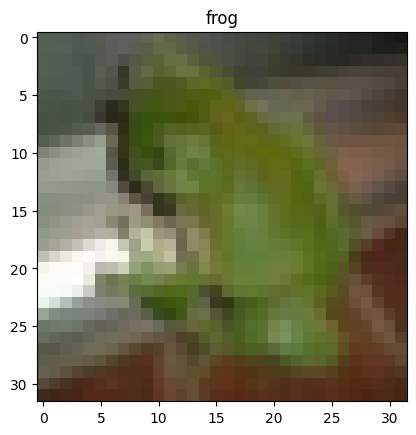

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The class of the image is: cat


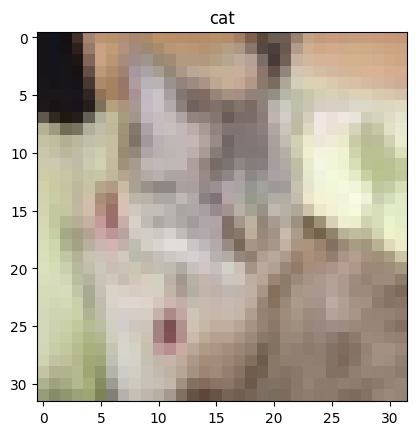

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The class of the image is: truck


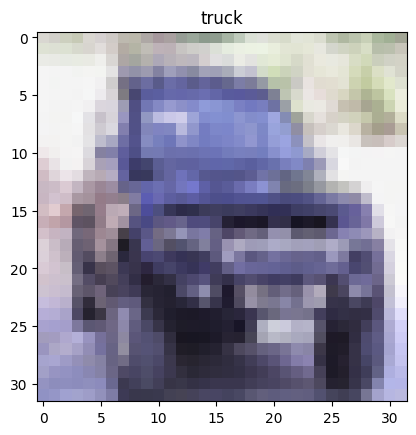

In [22]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

model5.summary()

model5.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

model5.evaluate(X_test, Y_test)

for i in range(10):
    predict(X_test[i], model5)